# Predictive Analysis of the Credit Scores using Logistic Regression and Bayes Naive

In [6]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 96.5/96.5 kB 5.4 MB/s eta 0:00:00


In [1]:
import pandas as pd

# Load Dataset

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
dataset = pd.read_excel(url, header=1)

In [3]:
# Display the first few rows of the dataset
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Inspect the Dataset

In [4]:
# Display the first few rows of the dataset
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Check for missing values
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# Normalize the Dataset

Normalizing the relevant features of the dataset to make sure that they are on a similar scale.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Selecting the relevant columns for normalization
cols_to_normalize = dataset.columns[1:-1]  # Exclude ID and target column
scaler = StandardScaler()
dataset[cols_to_normalize] = scaler.fit_transform(dataset[cols_to_normalize])

In [8]:
# Display the first few rows of the normalized dataset
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


# Split the Data

Spliting the dataset using cross-validation into training and test sets, and determining the best value for k-folds

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
import numpy as np

In [10]:
# Splitting the dataset
X = dataset.drop(columns=['ID', 'default payment next month'])  # Features
y = dataset['default payment next month']  # Target

In [12]:
# Using K-Fold Cross-Validation to determine the best k
k_values = [5, 10, 15, 20]
mean_accuracy_scores = []

for k in k_values:
    kf = KFold(n_splits=k)
    model = LogisticRegression(max_iter=1000)
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    mean_accuracy_scores.append(np.mean(scores))
    print(f"Cross-Validation results for k={k}: {scores}")
    print(f"Mean accuracy for k={k}: {np.mean(scores)}")

# Determine the best k
best_k = k_values[np.argmax(mean_accuracy_scores)]
print(f"Best k for cross-validation: {best_k}")

Cross-Validation results for k=5: [0.80466667 0.79833333 0.79866667 0.82766667 0.81916667]
Mean accuracy for k=5: 0.8097
Cross-Validation results for k=10: [0.79966667 0.80633333 0.79766667 0.801      0.80666667 0.793
 0.822      0.83066667 0.82566667 0.813     ]
Mean accuracy for k=10: 0.8095666666666667
Cross-Validation results for k=15: [0.7985 0.8    0.8105 0.7995 0.7985 0.8005 0.8035 0.817  0.783  0.8325
 0.8125 0.8355 0.8305 0.8065 0.82  ]
Mean accuracy for k=15: 0.8099000000000001
Cross-Validation results for k=20: [0.79666667 0.80333333 0.80133333 0.81066667 0.794      0.802
 0.802      0.80133333 0.806      0.80666667 0.79933333 0.79266667
 0.82533333 0.82       0.82866667 0.83066667 0.81866667 0.83333333
 0.81133333 0.81266667]
Mean accuracy for k=20: 0.8098333333333333
Best k for cross-validation: 15


# Train the Logistic Regression Model

Training the logistic regression model using the best k-value determined

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
# Split the data using the best k-value
kf = KFold(n_splits=best_k)
model = LogisticRegression(max_iter=1000)

In [15]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores)}")

Cross-Validation Accuracy Scores: [0.7985 0.8    0.8105 0.7995 0.7985 0.8005 0.8035 0.817  0.783  0.8325
 0.8125 0.8355 0.8305 0.8065 0.82  ]
Mean Accuracy: 0.8099000000000001


In [16]:
# Train the model on the entire dataset
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [17]:
# Evaluate the model
y_pred = model.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
print(f"Accuracy: {accuracy_score(y, y_pred)}")

[[22735   629]
 [ 5042  1594]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     23364
           1       0.72      0.24      0.36      6636

    accuracy                           0.81     30000
   macro avg       0.77      0.61      0.62     30000
weighted avg       0.80      0.81      0.77     30000

Accuracy: 0.8109666666666666


# Train the Naive Bayes Classifier

Choosing a probabilistic distribution such as Gaussian distribution, and training a Naive Bayes classifier

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
# Train the Naive Bayes model
nb_model = GaussianNB()

In [20]:
# Perform cross-validation
nb_scores = cross_val_score(nb_model, X, y, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores (Naive Bayes): {nb_scores}")
print(f"Mean Accuracy (Naive Bayes): {np.mean(nb_scores)}")

Cross-Validation Accuracy Scores (Naive Bayes): [0.6725 0.7025 0.73   0.671  0.721  0.662  0.6885 0.722  0.718  0.7405
 0.7135 0.7475 0.7635 0.6955 0.7605]
Mean Accuracy (Naive Bayes): 0.7139000000000001


In [21]:
# Train the model on the entire dataset
nb_model.fit(X, y)

GaussianNB()

In [22]:
# Evaluate the model
nb_y_pred = nb_model.predict(X)
print(confusion_matrix(y, nb_y_pred))
print(classification_report(y, nb_y_pred))
print(f"Accuracy (Naive Bayes): {accuracy_score(y, nb_y_pred)}")

[[17199  6165]
 [ 2340  4296]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80     23364
           1       0.41      0.65      0.50      6636

    accuracy                           0.72     30000
   macro avg       0.65      0.69      0.65     30000
weighted avg       0.78      0.72      0.74     30000

Accuracy (Naive Bayes): 0.7165


# Comparative Analysis

Comparing the performance of both models

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

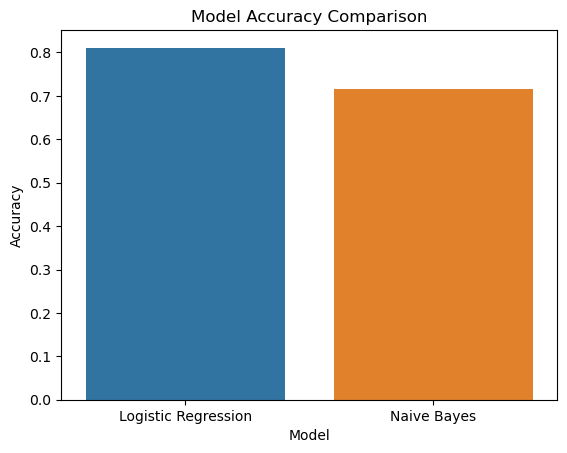

In [25]:
# Visualizing the comparison
logistic_accuracy = accuracy_score(y, y_pred)
nb_accuracy = accuracy_score(y, nb_y_pred)

accuracy_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [logistic_accuracy, nb_accuracy]
})

sns.barplot(x='Model', y='Accuracy', data=accuracy_comparison)
plt.title('Model Accuracy Comparison')
plt.show()

In [30]:
from sklearn.naive_bayes import BernoulliNB

In [31]:
# Train the Bernoulli Naive Bayes model
nb_model = BernoulliNB()

In [32]:
# Perform cross-validation
nb_scores = cross_val_score(nb_model, X, y, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores (Naive Bayes): {nb_scores}")
print(f"Mean Accuracy (Naive Bayes): {np.mean(nb_scores)}")

Cross-Validation Accuracy Scores (Naive Bayes): [0.642  0.651  0.6645 0.652  0.67   0.669  0.6675 0.6715 0.6125 0.712
 0.674  0.735  0.7045 0.6775 0.6725]
Mean Accuracy (Naive Bayes): 0.6716999999999999


In [33]:
# Train the model on the entire dataset
nb_model.fit(X, y)

BernoulliNB()

In [34]:
# Evaluate the model
nb_y_pred = nb_model.predict(X)
print(confusion_matrix(y, nb_y_pred))
print(classification_report(y, nb_y_pred))
print(f"Accuracy (Naive Bayes): {accuracy_score(y, nb_y_pred)}")

[[17386  5978]
 [ 3881  2755]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78     23364
           1       0.32      0.42      0.36      6636

    accuracy                           0.67     30000
   macro avg       0.57      0.58      0.57     30000
weighted avg       0.71      0.67      0.69     30000

Accuracy (Naive Bayes): 0.6713666666666667
